## yfinance란?

[yfinance](https://pypi.org/project/yfinance/)는 랜 애루시(Ran Aroussi)가 개발한 오픈 소스 라이브러리입니다. 이 라이브러리는 [야후 파이낸스(Yahoo! Finance)](https://finance.yahoo.com/)를 통해 금융 데이터를 액세스할 수 있도록 만들어졌습니다. 야후 파이낸스는 주식, 채권, 통화 및 암호화폐에 대한 광범위한 시장 데이터를 제공하고 있습니다.

### yfinance 패키지 설치

In [48]:
# ! pip install yfinance --quiet    # --quiet 설치 과정은 노춣하지 않고 결과만 노출 

## yfinance의 기본구조

In [49]:
import yfinance as yf

### 티커 객체 정의하기

`yfinance`를 사용하기 위해서는 먼저 티커를 선택하고 이를 객체화하는 작업이 필요합니다. 티커(Ticker)란 금융시장에서 특정 종목을 표현하는 약자를 의미합니다. 가령 애플의 경우 주식시장에서 'AAPL'이라는 티커를 가지고 있고, 마이크로소프트의 경우 'MSFT'라는 티커를 가지고 있습니다. 이 티커는 당연히 각 종목별로 고유한 값입니다. `yfinance`에서는 티커를 객체화하기 위해 `Ticker()`라는 메서드를 사용하고 있습니다. 여기서는 간단하게 애플의 티커 객체를 구현해보겠습니다.


In [50]:
aapl = yf.Ticker('AAPL')
print(aapl)

yfinance.Ticker object <AAPL>


### 종목 기본정보

이제 티커를 정의했으니 해당 종목이 어떤 종목인지 기본적인 정보를 출력해보겠습니다. 티커 객체는 `info`라는 속성(Attribute)을 가지고 있습니다. 이를 활용하면 종목에 대한 세세한 정보를 얻을 수 있습니다. 

In [51]:
# aapl.info         # librady has a bug

### 시장 데이터 다운로드

종목의 과거 가격 및 거래량에 대한 데이터를 다운받기 위해서는 `history()`라는 메서드를 사용하면 됩니다. 이 메서드는 단일 종목 혹은 여러 종목들에 대한 시장 데이터를 가져와 우리에게 전달해주는 역할을 하고 있습니다.

우선 가장 단순하게 구현을 하기 위해 애플 주식의 가능한 한 많은 일별 데이터를 가져와보도록 하겠습니다.

In [52]:
data = aapl.history(period='max')
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099721,0.100155,0.099721,0.099721,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094953,0.094953,0.094519,0.094519,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.088015,0.088015,0.087581,0.087581,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089749,0.090183,0.089749,0.089749,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.092351,0.092785,0.092351,0.092351,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2023-02-13 00:00:00-05:00,150.949997,154.259995,150.919998,153.850006,62199000,0.0,0.0
2023-02-14 00:00:00-05:00,152.119995,153.770004,150.860001,153.199997,61707600,0.0,0.0
2023-02-15 00:00:00-05:00,153.110001,155.500000,152.880005,155.330002,65669300,0.0,0.0


애플 주식에 대한 과거 데이터가 잘 들어오는 것을 확인할 수 있습니다. 간단히 종가를 기준으로 가격 그래프를 만들어보겠습니다. 앞으로 우리는 이 `history()` 메서드를 사용하여 여러 ETF들에 대한 과거 데이터를 다운받아 사용할 것입니다.

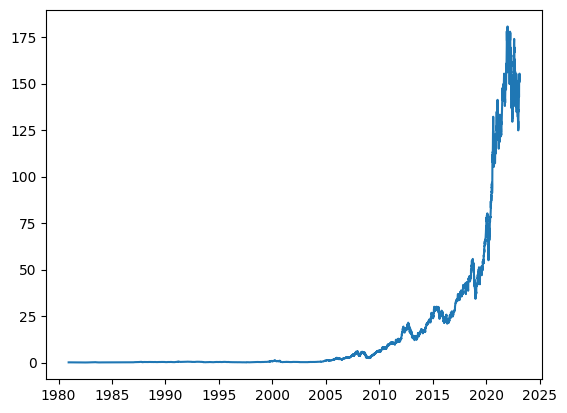

In [53]:
import matplotlib.pyplot as plt
plt.plot(data['Close'])

`history()` 메서드는 몇 가지 인자를 받아 이에 맞게 데이터 쿼리 작업을 처리할 수 있습니다. 아래는 `history()` 메서드가 가지고 있는 인자(Parameter)와 이에 대한 설명입니다.


- `period` : 데이터를 다운받을 기간을 설정합니다. 기본값은 한달(`1mo`)입니다. (`1d`, `5d`, `1mo`, `3mo`, `6mo`, `1y`, `2y`, `5y`, `10y`, `ytd`, `max`)
- `interval` : 데이터의 주기를 설정합니다. 주기를 일별보다 낮은 장중으로 설정할 경우 최대 60일간의 데이터만 제공합니다. 기본값은 하루(`1d`)입니다. (`1m`, `2m`, `5m`, `15m`, `30m`, `60m`, `90m`, `1h`, `1d`, `5d`, `1wk`, `1mo`, `3mo`)
- `start` : `period` 인자를 사용하지 않을 경우 데이터의 시작일을 설정합니다. `'YYYY-MM-DD'` 문자열을 사용하거나 `datetime` 형식의 날짜를 사용합니다.
- `end` : `period` 인자를 사용하지 않을 경우 데이터의 종료일을 설정합니다. `'YYYY-MM-DD'` 문자열을 사용하거나 `datetime` 형식의 날짜를 사용합니다.
- `prepost` : 시간외거래의 데이터를 결과에 포함시킬것인지를 설정합니다. 기본값은 `False`입니다.
- `auto_adjust` : 자동으로 수정주가를 사용할 것인지를 설정합니다. 기본값은 `True`입니다.
- `actions` : 주식의 경우 배당이나 주식 분할 같은 기업공시 이벤트를 다운받을지를 설정합니다. 기본값은 `True`입니다.

In [54]:
data = aapl.history(start='2015-01-01', end='2022-03-11', actions=False)
data.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2022-03-04 00:00:00-05:00,163.499575,164.553190,161.123966,162.187515,83737200
2022-03-07 00:00:00-05:00,162.376372,164.026380,158.082376,158.340820,96418800
2022-03-08 00:00:00-05:00,157.863700,161.899251,154.861880,156.492004,131148300
2022-03-09 00:00:00-05:00,160.507692,162.426078,158.450163,161.968842,91454900
2022-03-10 00:00:00-05:00,159.235383,159.424241,155.040792,157.565506,105342000


<Axes: xlabel='Date'>

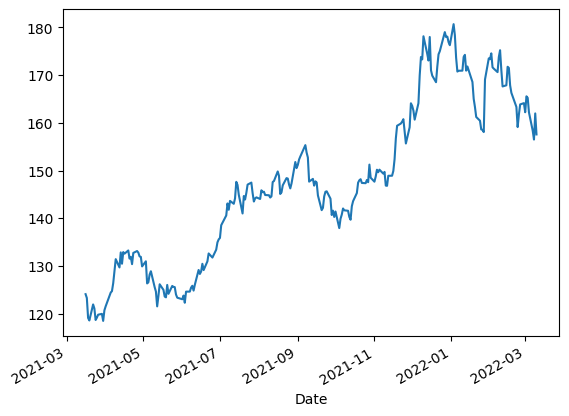

In [55]:
data['Close'].iloc[-250:].plot()

### 기타 데이터 다운로드

`yfinance`는 가격 데이터 뿐만 아니라 재무 데이터, 대주주 보유 현황, 애널리스트 의견, 뉴스 데이터 또한 제공합니다. 아래의 리스트는 `yfinance`를 통해 얻을 수 있는 주요 데이터를 가져올 수 있는 속성값들입니다.

- `financials` : 연도별 재무제표
- `quarterly_financials` : 분기별 재무제표
- `balance_sheet` : 연도별 대차대조표
- `quarterly_balance_sheet` : 분기별 대차대조표
- `cashflow` : 연도별 현금흐름표
- `quaterly_cashflow` : 분기별 현금흐름표
- `earnings` : 연도별 실적
- `quarterly_earnings` : 분기별 실적
- `institutional_holders` : 주요 기관 대주주 보유현황
- `recommendations` : 애널리스트 의견
- `news` : 최근 뉴스

In [56]:
# 연도별 재무제표
# aapl.financials       # library has a bug

In [57]:
# 분기별 재무재표
# aapl.quarterly_financials     

In [58]:
# 연도별 대차대조표
# aapl.balance_sheet

In [59]:
# 분기별 대차대조표
# aapl.quarterly_balance_sheet

In [60]:
# 연도별 현금흐름표
# aapl.cashflow

In [61]:
# 분기별 현금흐름표
# aapl.quarterly_cashflow

In [62]:
# 분기별 실적
# aapl.quarterly_earnings

In [63]:
# 주요 기관 보유현황
# aapl.institutional_holders

In [64]:
# 애널리스트 의견
# aapl.recommendations[aapl.recommendations['Firm'] == 'Morgan Stanley']

In [65]:
# 최근 뉴스
# aapl.news

## yfinance로 ETF 가격 데이터 다운로드하기

### 여러 종목 데이터 한꺼번에 받기

지금까지는 단일 종목에 대한 데이터 쿼리에 대해서만 다루었습니다. 그런데 만약  여러 종목들에 대한 데이터를 한꺼번에 받고 싶다면 어떻게 해야할까요? 이런 경우에도 방법은 똑같습니다. 다만 여러 종목들에 대한 티커 객체를 만들고자 한다면 `Ticker()` 메서드가 아닌 `Tickers()` 메서드를 사용해야 합니다. SPY와 TLT, 두 가지 ETF의 가격 데이터를 다운로드해보겠습니다. SPY는 S&P 500 지수를 추종하는 ETF이며, TLT는 미국 장기채를 추종하는 ETF입니다. 각각 미국 주식과 미국 채권을 대표하는 ETF라고 할 수 있습니다.

In [66]:
tickers = ['SPY', 'TLT']

etf = yf.Tickers(tickers)

data = etf.history(start='2002-08-01', actions=False)
data


[*********************100%***********************]  2 of 2 completed


Close                    High                     Low  \
                   SPY         TLT         SPY         TLT         SPY   
Date                                                                     
2002-08-01   59.923031   41.877312   61.657680   41.887401   59.619300   
2002-08-02   58.579861   42.306187   60.010780   42.432323   57.790158   
2002-08-05   56.541508   42.492844   58.674388   42.603844   56.393021   
2002-08-06   58.444874   42.129574   59.329076   42.331393   57.445934   
2002-08-07   59.464066   42.230484   59.734051   42.452485   57.891405   
...                ...         ...         ...         ...         ...   
2023-02-13  412.829987  104.260002  412.970001  104.419998  408.239990   
2023-02-14  412.640015  104.019997  415.049988  104.830002  408.510010   
2023-02-15  413.980011  103.050003  414.059998  103.949997  409.470001   
2023-02-16  408.279999  101.589996  412.910004  102.220001  408.140015   
2023-02-17  407.260010  102.379997  407.510010  102.379997  404.049988   

                              Open                Volume            
                   TLT         SPY         TLT       SPY       TLT  
Date                                                                
2002-08-01   41.645221   61.340448   41.645221  66571900     25000  
2002-08-02   41.816776   59.734043   41.958053  51772900     52800  
2002-08-05   42.306160   58.377403   42.402025  47191300     61100  
2002-08-06   41.988302   57.526932   42.316257  64730000     64900  
2002-08-07   42.058940   59.308827   42.180030  43289400     40300  
...                ...         ...         ...       ...       ...  
2023-02-13  103.580002  408.720001  103.709999  64913500  13134300  
2023-02-14  103.139999  411.239990  104.199997  88389300  15440300  
2023-02-15  102.500000  410.350006  103.550003  61685300  15567600  
2023-02-16  101.330002  408.790009  102.070000  76431500  19267300  
2023-02-17  100.970001  406.059998  101.099998  89169100  19553800  

[5174 rows x 10 columns]

각각의 ETF에 대해 OHLCV 데이터가 들어오는 것을 확인할 수 있습니다. 만약 종가 데이터만 필요하다면 판다스 데이터프레임의 [`drop()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)과 [`droplevel()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.droplevel.html) 메서드를 사용해 데이터를 축약할 수 있습니다.

In [67]:
data.drop(['Open', 'Low', 'High', 'Volume'], inplace=True, axis=1)      # column 삭제
data

Close            
                   SPY         TLT
Date                              
2002-08-01   59.923031   41.877312
2002-08-02   58.579861   42.306187
2002-08-05   56.541508   42.492844
2002-08-06   58.444874   42.129574
2002-08-07   59.464066   42.230484
...                ...         ...
2023-02-13  412.829987  104.260002
2023-02-14  412.640015  104.019997
2023-02-15  413.980011  103.050003
2023-02-16  408.279999  101.589996
2023-02-17  407.260010  102.379997

[5174 rows x 2 columns]

In [68]:
data = data.droplevel(0, axis=1)        # 첫 행 삭제
data

,SPY,TLT
Date,,
2002-08-01,59.923031,41.877312
2002-08-02,58.579861,42.306187
2002-08-05,56.541508,42.492844
2002-08-06,58.444874,42.129574
2002-08-07,59.464066,42.230484
...,...,...
2023-02-13,412.829987,104.260002
2023-02-14,412.640015,104.019997
2023-02-15,413.980011,103.050003


<Axes: xlabel='Date'>

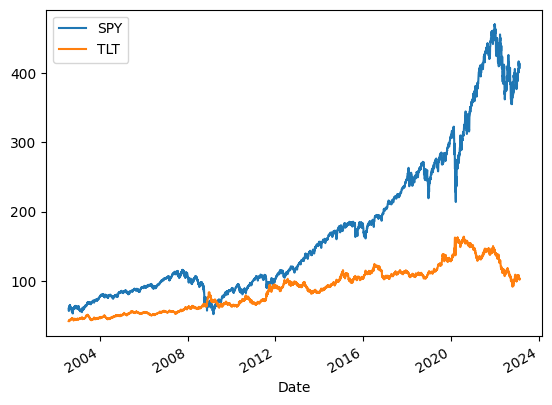

In [69]:
data.plot()

### 입력변수: 수익률, 변동성, 상관계수

#### 1. 수익률

In [70]:
# 수익률 계산
rets = data.pct_change().fillna(0)      # pct_change() 변화율 계산 메서드

# 수익률 데이터 확인
rets.head()

,SPY,TLT
Date,,
2002-08-01,0.000000,0.000000
2002-08-02,-0.022415,0.010241
2002-08-05,-0.034796,0.004412
2002-08-06,0.033663,-0.008549
2002-08-07,0.017439,0.002395


Text(0, 0.5, 'Returns')

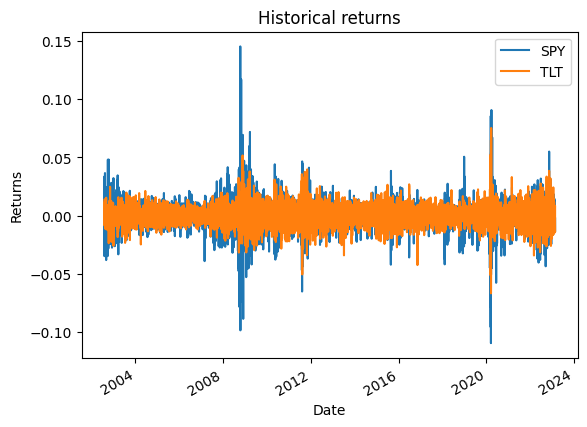

In [71]:
# 수익률 데이터 시각화
rets.plot()
plt.title('Historical returns')
plt.xlabel('Date')
plt.ylabel('Returns')

#### 2. 변동성

In [72]:
import numpy as np

In [73]:
# 전체 기간 변동성 계산
total_vols = rets.std() * np.sqrt(252)      # 표준편차 연율화 \sqrt{252}로 계산
total_vols


SPY    0.193549
TLT    0.143030
dtype: float64

In [74]:
# 1년 단위 롤링 변동성 계산 및 연율화
vols = rets.rolling(252).std() * np.sqrt(252)
vols

,SPY,TLT
Date,,
2002-08-01,NaN,NaN
2002-08-02,NaN,NaN
2002-08-05,NaN,NaN
2002-08-06,NaN,NaN
2002-08-07,NaN,NaN
...,...,...
2023-02-13,0.240417,0.206870
2023-02-14,0.239614,0.206273
2023-02-15,0.239615,0.206122


Text(0, 0.5, 'Vols')

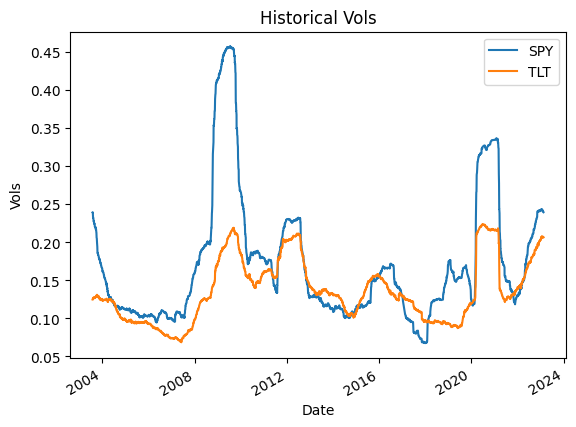

In [75]:
# 변동성 시각화
vols.plot()
plt.title('Historical Vols')
plt.xlabel('Date')
plt.ylabel('Vols')

#### 3. 상관계수

In [76]:
# SPY과 TLT의 수익률
spy_rets = rets['SPY']
tlt_rets = rets['TLT']

# 전체 기간 상관계수 계산
total_corr = spy_rets.corr(tlt_rets)
total_corr

-0.356983712730542

In [77]:
# 1년 단위 롤링 상관계수 계산
corr = spy_rets.rolling(252).corr(tlt_rets)
corr

Date
2002-08-01         NaN
2002-08-02         NaN
2002-08-05         NaN
2002-08-06         NaN
2002-08-07         NaN
                ...   
2023-02-13    0.093693
2023-02-14    0.100556
2023-02-15    0.099316
2023-02-16    0.106413
2023-02-17    0.105781
Length: 5174, dtype: float64

Text(0, 0.5, 'Correlation')

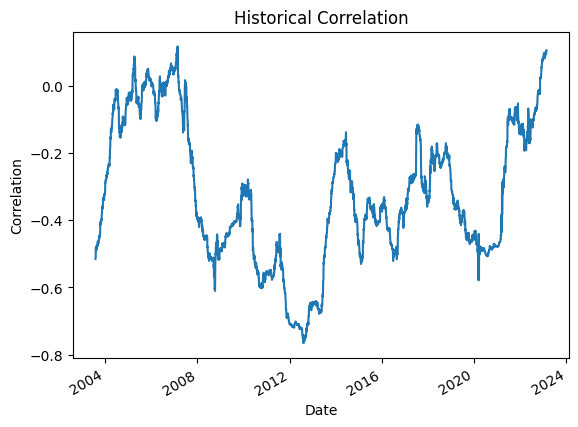

In [78]:
# 상관계수 시각화
corr.plot()
plt.title('Historical Correlation')
plt.xlabel('Date')
plt.ylabel('Correlation')

#### 4. ETF 유니버스 데이터 처리

#### ETF 유니버스

| Ticker | Sector |
| ------ | -----  |
| XLB | 소재 |
| XLE | 에너지 |
| XLF | 금융 |
| XLI | 산업재 |
| XLK | IT |
| XLP | 필수소비재 |
| XLU | 유틸리티 |
| XLV | 헬스케어 |
| XLY | 임의소비재 |

In [81]:
# ETF 유니버스 티커 설정
tickers = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']

# 티커 객체 선언
yfObj = yf.Tickers(tickers)

# 과거 데이터 다운로드
df = yfObj.history(start='2011-01-01', end='2022-10-14')

# 종가를 제외한 나머지 컬럼 삭제
df.drop(['Open', 'High', 'Low', 'Dividends', 'Stock Splits', 'Volume', 'Capital Gains'], inplace=True, axis=1)

# NaN 값을 이전 값으로 채워넣기
df.ffill(inplace=True)

# 첫 번째 칼럼 레벨 삭제
df = df.droplevel(0, axis=1)

# 주간 단위로 데이터 재설정
df = df.resample('W').last()           # 'W' : weekly로 리샘플, last(): 마지막날

[*********************100%***********************]  9 of 9 completed


In [82]:
df

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,
2011-01-09,29.849518,45.442646,10.522149,27.864805,21.535374,21.036848,20.785419,26.165464,32.254101
2011-01-16,30.231306,47.019966,10.846507,28.378481,21.886629,21.254248,20.890732,26.255215,32.442337
2011-01-23,29.202808,46.653908,10.677839,28.370579,21.510292,21.370192,21.028952,26.263369,32.356766
2011-01-30,29.459936,47.326122,10.541614,28.315250,21.602276,21.000622,20.831491,25.790154,31.740784
2011-02-06,30.839054,49.336002,10.775148,29.066006,22.321526,21.232508,20.930223,26.377594,32.690437
...,...,...,...,...,...,...,...,...,...
2022-09-18,72.023422,76.802979,32.682068,88.363251,128.025391,70.364418,73.368683,126.423218,157.179230
2022-09-25,67.989548,69.761497,30.856514,84.347420,123.385712,68.886017,71.177612,122.226517,146.019806
2022-10-02,67.572250,71.285797,30.170815,82.446487,118.439911,66.254890,64.978340,120.613159,142.060654


<Axes: xlabel='Date'>

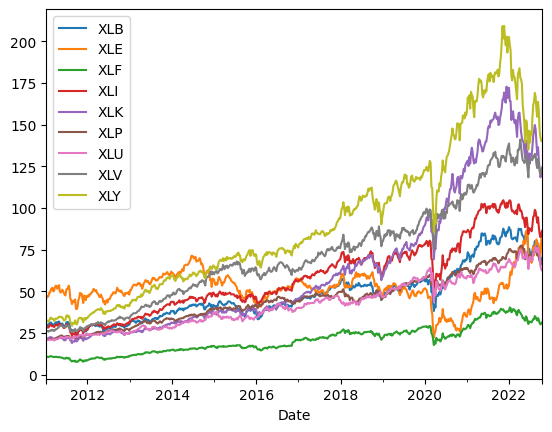

In [83]:
# 역사적 가격 그래프 시각화
df.plot()

<Axes: xlabel='Date'>

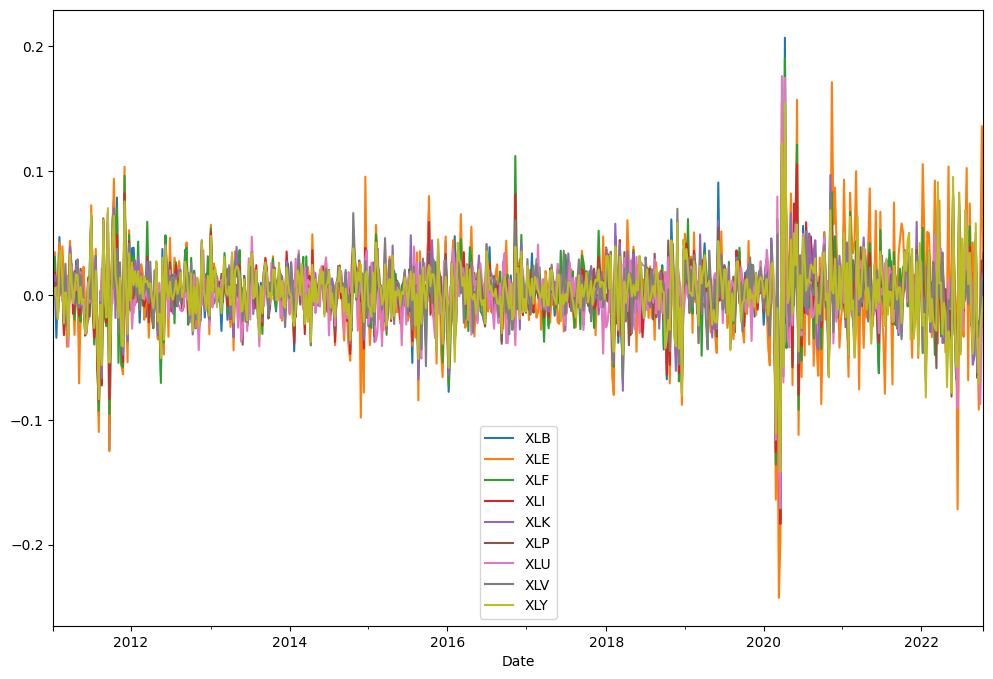

In [84]:
# ETF 수익률 계산
rets = df.pct_change().fillna(0)

# 수익률 시각화
rets.plot(figsize=(12, 8))

<Axes: xlabel='Date'>

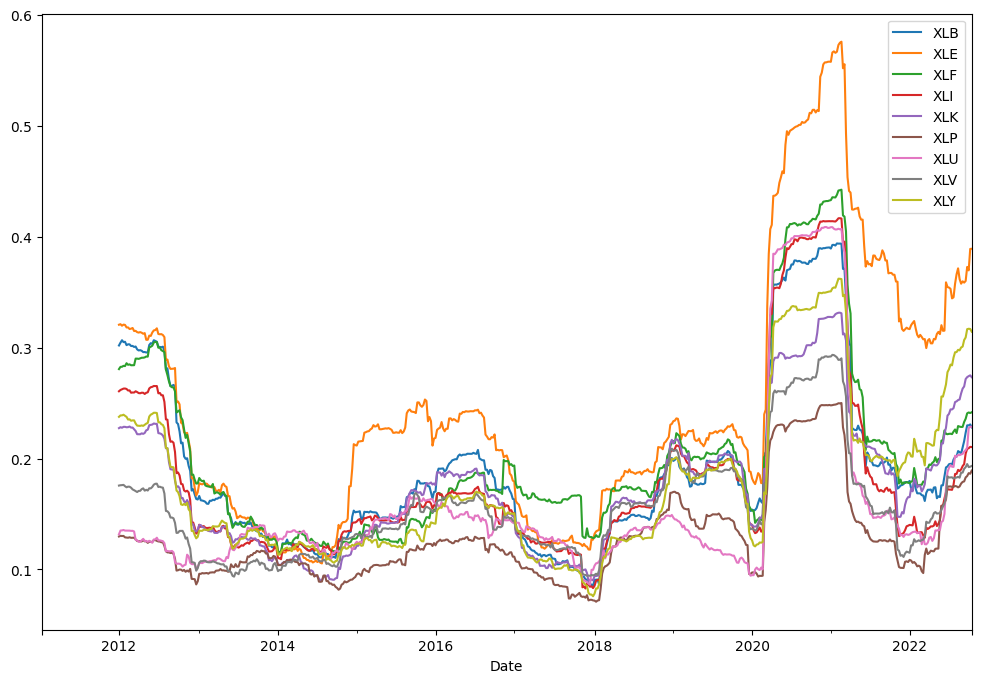

In [85]:
# 1년 단위 롤링 변동성 계산 및 연율화
vols = rets.rolling(52).std() * np.sqrt(52)

# 변동성 시각화
vols.plot(figsize=(12, 8))

In [86]:
# 전체 기간 ETF 상관계수 계산
corr = rets.corr()
corr

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
XLB,1.000000,0.719689,0.829265,0.886239,0.737775,0.612623,0.502272,0.684392,0.774422
XLE,0.719689,1.000000,0.705963,0.732264,0.513575,0.470045,0.382715,0.498355,0.552228
XLF,0.829265,0.705963,1.000000,0.887685,0.715743,0.619181,0.492558,0.675950,0.780120
XLI,0.886239,0.732264,0.887685,1.000000,0.791120,0.695932,0.572719,0.723720,0.831997
XLK,0.737775,0.513575,0.715743,0.791120,1.000000,0.680500,0.492138,0.735613,0.868779
XLP,0.612623,0.470045,0.619181,0.695932,0.680500,1.000000,0.677202,0.718565,0.690611
XLU,0.502272,0.382715,0.492558,0.572719,0.492138,0.677202,1.000000,0.569009,0.537086
XLV,0.684392,0.498355,0.675950,0.723720,0.735613,0.718565,0.569009,1.000000,0.726924
XLY,0.774422,0.552228,0.780120,0.831997,0.868779,0.690611,0.537086,0.726924,1.000000


<Axes: >

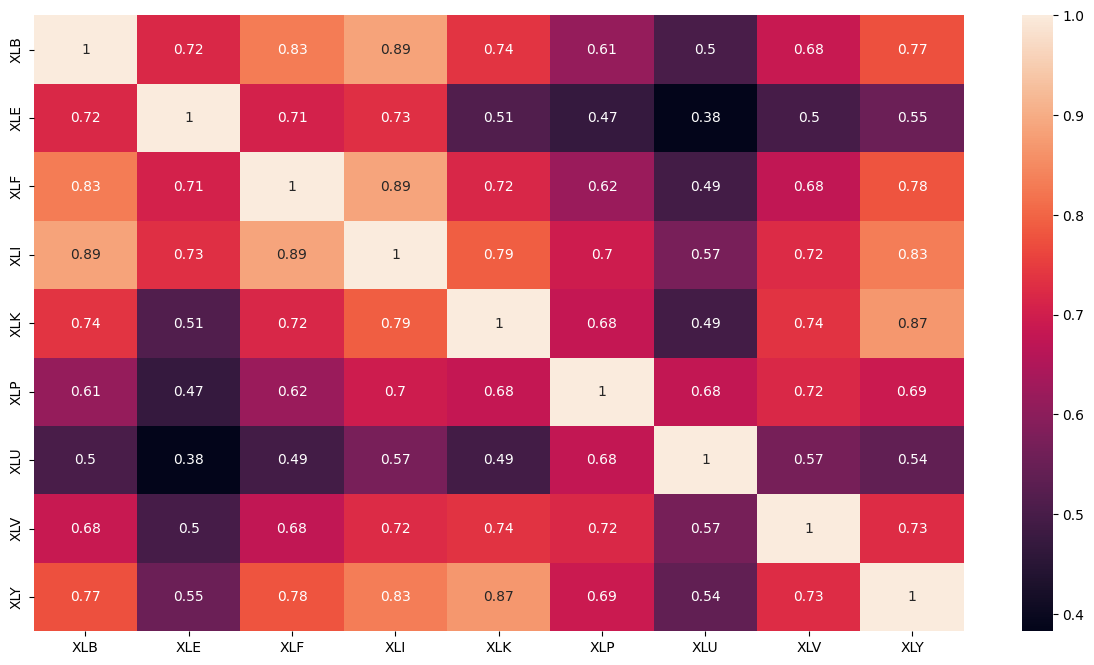

In [87]:
# seaborn 패키지 임포트
import seaborn as sns

# 히트맵 시각화
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True)       # annot=True : 안에 숫자 표시

##### 공분산 행렬 특징 이해하기

In [88]:
# 공분산 계산 및 연율화
cov = rets.cov() * 52
cov

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
XLB,0.043178,0.041900,0.037557,0.036560,0.029055,0.017391,0.018630,0.023177,0.031572
XLE,0.041900,0.078500,0.043111,0.040731,0.027271,0.017992,0.019141,0.022756,0.030356
XLF,0.037557,0.043111,0.047506,0.038411,0.029566,0.018437,0.019163,0.024011,0.033360
XLI,0.036560,0.040731,0.038411,0.039413,0.029766,0.018876,0.020296,0.023416,0.032407
XLK,0.029055,0.027271,0.029566,0.029766,0.035919,0.017620,0.016649,0.022721,0.032305
XLP,0.017391,0.017992,0.018437,0.018876,0.017620,0.018665,0.016515,0.015999,0.018511
XLU,0.018630,0.019141,0.019163,0.020296,0.016649,0.016515,0.031863,0.016553,0.018810
XLV,0.023177,0.022756,0.024011,0.023416,0.022721,0.015999,0.016553,0.026561,0.023244
XLY,0.031572,0.030356,0.033360,0.032407,0.032305,0.018511,0.018810,0.023244,0.038494


In [89]:
# var() 메서드를 사용한 ETF 분산 계산
vols_1 = rets.var() * 52
vols_1

XLB    0.043178
XLE    0.078500
XLF    0.047506
XLI    0.039413
XLK    0.035919
XLP    0.018665
XLU    0.031863
XLV    0.026561
XLY    0.038494
dtype: float64

In [90]:
# 공분산 행렬 및 diag() 메서드를 사용한 ETF 분산 계산
vols_2 = np.diag(cov)
vols_2

array([0.04317783, 0.07850006, 0.04750553, 0.03941328, 0.03591859,
       0.0186647 , 0.03186309, 0.02656081, 0.03849363])

## 주식-채권 배분 모델

### 패키지 임포트

In [91]:
# 패키지 임포트
import numpy as np
import yfinance as yf 
import seaborn as sns
sns.set()

### 가격 데이터 다운로드 및 전처리

In [92]:
# 티커
tickers = ['SPY', 'TLT']

# 티커 객체
etf = yf.Tickers(tickers)

# 데이터 다운로드
data = etf.history(start='2002-08-01', actions=False)
data

[*********************100%***********************]  2 of 2 completed


Close                    High                     Low  \
                   SPY         TLT         SPY         TLT         SPY   
Date                                                                     
2002-08-01   59.923065   41.877316   61.657716   41.887405   59.619335   
2002-08-02   58.579868   42.306171   60.010788   42.432308   57.790165   
2002-08-05   56.541500   42.492859   58.674380   42.603860   56.393013   
2002-08-06   58.444870   42.129604   59.329072   42.331424   57.445931   
2002-08-07   59.464066   42.230522   59.734051   42.452524   57.891405   
...                ...         ...         ...         ...         ...   
2023-02-13  412.829987  104.260002  412.970001  104.419998  408.239990   
2023-02-14  412.640015  104.019997  415.049988  104.830002  408.510010   
2023-02-15  413.980011  103.050003  414.059998  103.949997  409.470001   
2023-02-16  408.279999  101.589996  412.910004  102.220001  408.140015   
2023-02-17  407.260010  102.379997  407.510010  102.379997  404.049988   

                              Open                Volume            
                   TLT         SPY         TLT       SPY       TLT  
Date                                                                
2002-08-01   41.645225   61.340483   41.645225  66571900     25000  
2002-08-02   41.816761   59.734051   41.958037  51772900     52800  
2002-08-05   42.306176   58.377395   42.402040  47191300     61100  
2002-08-06   41.988332   57.526928   42.316288  64730000     64900  
2002-08-07   42.058978   59.308827   42.180068  43289400     40300  
...                ...         ...         ...       ...       ...  
2023-02-13  103.580002  408.720001  103.709999  64913500  13134300  
2023-02-14  103.139999  411.239990  104.199997  88389300  15440300  
2023-02-15  102.500000  410.350006  103.550003  61685300  15567600  
2023-02-16  101.330002  408.790009  102.070000  76431500  19267300  
2023-02-17  100.970001  406.059998  101.099998  89169100  19553800  

[5174 rows x 10 columns]

In [93]:
# 불필요한 칼럼 제거
data.drop(['Open', 'High', 'Low', 'Volume'], inplace=True, axis=1)
data

Close            
                   SPY         TLT
Date                              
2002-08-01   59.923065   41.877316
2002-08-02   58.579868   42.306171
2002-08-05   56.541500   42.492859
2002-08-06   58.444870   42.129604
2002-08-07   59.464066   42.230522
...                ...         ...
2023-02-13  412.829987  104.260002
2023-02-14  412.640015  104.019997
2023-02-15  413.980011  103.050003
2023-02-16  408.279999  101.589996
2023-02-17  407.260010  102.379997

[5174 rows x 2 columns]

In [94]:
# 0 라벨 칼럼 제목 제거
data = data.droplevel(0, axis=1)
data

,SPY,TLT
Date,,
2002-08-01,59.923065,41.877316
2002-08-02,58.579868,42.306171
2002-08-05,56.541500,42.492859
2002-08-06,58.444870,42.129604
2002-08-07,59.464066,42.230522
...,...,...
2023-02-13,412.829987,104.260002
2023-02-14,412.640015,104.019997
2023-02-15,413.980011,103.050003


<Axes: xlabel='Date'>

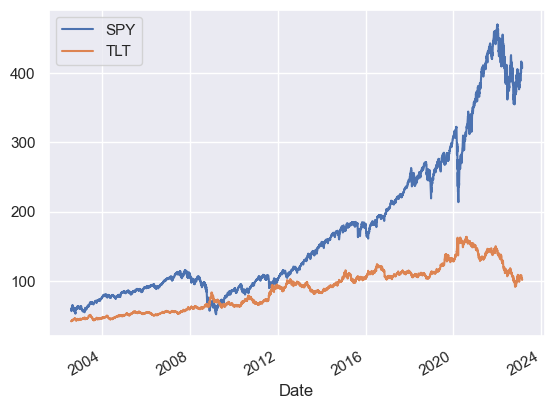

In [95]:
# 가격 그래프
data.plot()

### 일별 수익률 데이터

<Axes: xlabel='Date'>

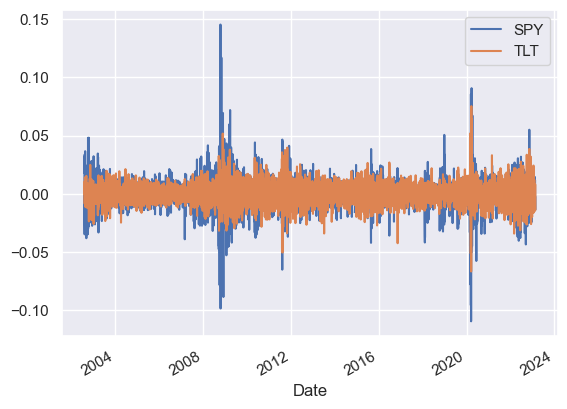

In [96]:
# 일별 수익률 데이터
rets = data.pct_change().fillna(0)

# 수익률 데이터 시각화
rets.plot()

### 개별 자산 평균 수익률과 변동성, 샤프비율

In [97]:
# 주식 기대 수익률과 변동성
stock_mu = rets['SPY'].mean() * 252
stock_sigma = rets['SPY'].std() * np.sqrt(252)

# 주식 샤프 비율
stock_sr = stock_mu / stock_sigma

# 채권 기대 수익률과 변동성
bond_mu = rets['TLT'].mean() * 252
bond_sigma = rets['TLT'].std() * np.sqrt(252)

# 채권 샤프 비율
bond_sr = bond_mu / bond_sigma

# 결과 출력
print(stock_sr, bond_sr)

0.5791949379933191 0.37590900770246677


### 60-40 포트폴리오 구현

In [98]:
# 주식 가중치 60%, 채권 가중치 40%
weights = 0.6

In [99]:
# 포트폴리오 수익률
port_ret = weights * rets['SPY'] + (1 - weights) * rets['TLT']

In [100]:
# NaN 값 제거
port_ret.dropna(inplace=True)

In [101]:
# 결과 출력
port_ret

Date
2002-08-01    0.000000
2002-08-02   -0.009353
2002-08-05   -0.019113
2002-08-06    0.016779
2002-08-07    0.011421
                ...   
2023-02-13    0.010409
2023-02-14   -0.001197
2023-02-15   -0.001782
2023-02-16   -0.013928
2023-02-17    0.001612
Length: 5174, dtype: float64

<Axes: xlabel='Date'>

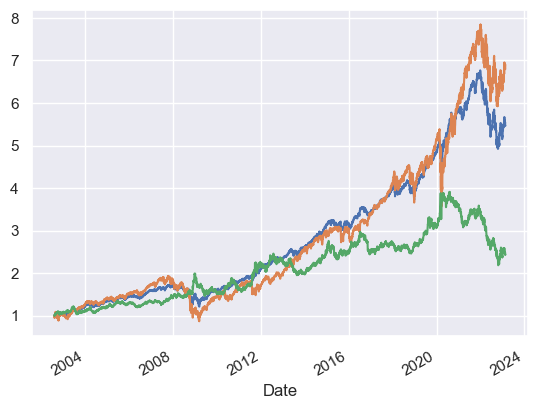

In [102]:
# 그래프 시각화
(1 + port_ret).cumprod().plot()     # cumprod : 수익률누적곱
(1 + rets['SPY']).cumprod().plot()
(1+ rets['TLT']).cumprod().plot()

### 포트폴리오 수익률과 변동성 분석

In [103]:
# 포트폴리오 기대수익률
port_mu = port_ret.mean() * 252

# 포트폴리오 변동성
port_sigma = port_ret.std() * np.sqrt(252)

# 결과 출력
print('Returns = {}'.format(port_mu))
print('Vol = {}'.format(port_sigma))
print('SR = {}'.format(port_mu / port_sigma))

Returns = 0.08876810353357112
Vol = 0.10961587882787133
SR = 0.8098106267337668


### 주식-채권 상관계수 분석

In [104]:
# 1년 롤링 상관계수
historical_corr = rets['SPY'].rolling(252).corr(rets['TLT'])

<Axes: xlabel='Date'>

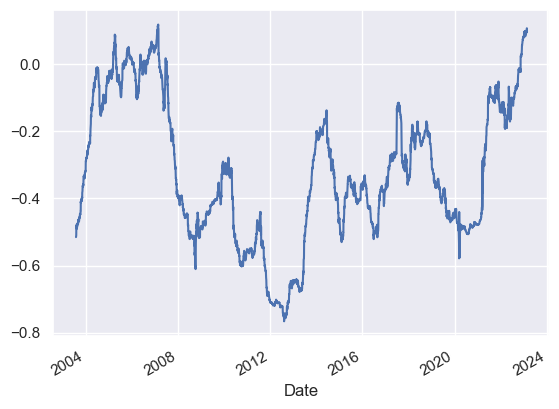

In [105]:
# 롤링 상관계수 시각화
historical_corr.plot()